In [1]:
cd ..

/home/boc7rng/ros2_ws/src/trace_analysis


In [2]:
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from tracetools_analysis.analysis.ros_processor import *
from tracetools_analysis.analysis.to_pandas import *

In [3]:
def _get_events_from_pickled_file(file):
    p = pickle.Unpickler(file)
    events = []
    while True:
        try:
            events.append(p.load())
        except EOFError as _:
            break  # we're done
    return events

In [4]:
pickle_filename = '../../the-pickle-file'
with open(pickle_filename, 'rb') as f:
    events = _get_events_from_pickled_file(f)
    print(f'imported {len(events)} events')
    processor = ros_process(events)

df = callback_durations_to_df(processor)
print(df.to_string())

imported 538 events
     callback_address  duration      start_timestamp
0      93936519421304     46536  1558603909545758681
1      93936519421304     42644  1558603910045393758
2      93936519421304     40642  1558603910545455527
3      93936519421304     34351  1558603911045288748
4      93936519421304     15474  1558603911545113622
5      93936519421304     14516  1558603912045117407
6      93936519421304     15022  1558603912545132769
7      93936519421304     17849  1558603913045117649
8      93936519421304     33639  1558603913545454326
9      93936519421304     38705  1558603914045519078
10     93936519421304     45665  1558603914545563667
11     93936519421304     16300  1558603915045232751
12     93936519421304     44290  1558603915545598209
13     93936519421304     40953  1558603916045634003
14     93936519421304     40437  1558603916545775210
15     93936519421304     43514  1558603917045613746
16     93936519421304     41327  1558603917545655079
17     93936519421304     

unhandled event name: ros2:rcl_publisher_init
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_publisher_init
unhandled event name: ros2:rcl_publisher_init
unhandled event name: ros2:rcl_publisher_init
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandled event name: ros2:rcl_service_init
unhandled event name: ros2:rclcpp_service_callback_added
unhandle

In [5]:
# Get a list of callback addresses
callback_addresses = set(df['callback_address'])
# Split df
durations = {}
for addr in callback_addresses:
    durations[addr] = df.loc[df.loc[:, 'callback_address'] == addr, :]

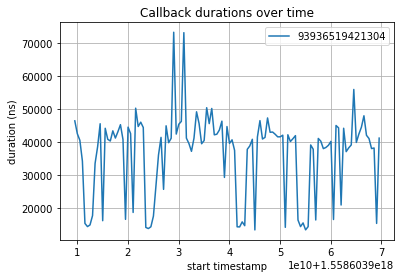

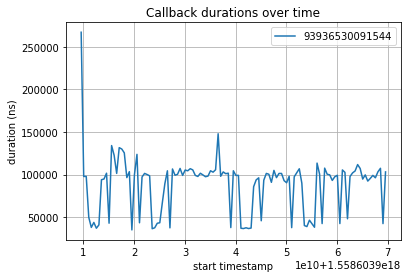

In [6]:
plt.figure()
for addr, duration in durations.items():
    ax = duration.plot(x='start_timestamp', y='duration')
    ax.legend([str(addr)])
    ax.set_xlabel('start timestamp')
    ax.set_ylabel('duration (ns)')
    plt.title('Callback durations over time')
    plt.grid()

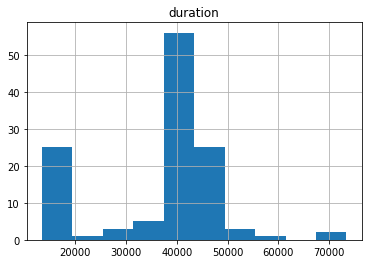

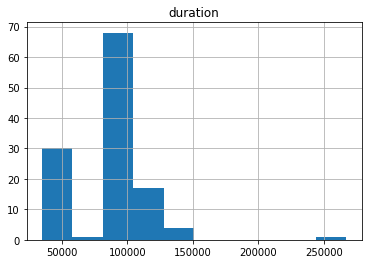

In [9]:
plt.figure()
for addr, duration in durations.items():
    duration.hist(column='duration')